In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import scipy.sparse as spa
import scipy.sparse.linalg as spalin
from tqdm import trange
import matplotlib.colors as mcolors
import imageio
import sys
sys.path.append("..")
from spatial_ultis import *
from dyn_ultis import *

In [2]:
T, t_step, record_step = 20, 100, 10

rescale = 425
N_E, N_I = 4900, 1225
conn_NEE, conn_NIE, conn_NEI, conn_NII = 200, 50, 200, 50
J_EE, J_IE, J_EI, J_II = 5/rescale, 9/rescale, -9/rescale, -12/rescale
sigma_EE, sigma_IE, sigma_EI, sigma_II = 10/rescale, 18/rescale, 18/rescale, 24/rescale
d_EE, d_IE, d_EI, d_II = 0.1, 0.1, 0.1, 0.2


params = Network_Params(N_E = N_E, N_I = N_I,
    N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
    d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
    g_bar_EE = J_EE * conn_NEE, g_bar_EI = J_EI * conn_NEI, g_bar_IE = J_IE * conn_NIE, g_bar_II = J_II * conn_NII,
    g_EE = sigma_EE * np.sqrt(conn_NEE), g_EI = sigma_EI * np.sqrt(conn_NEI), g_IE = sigma_IE * np.sqrt(conn_NIE), g_II = sigma_II * np.sqrt(conn_NII)
    )

In [3]:
dist_list = calc_dist(params, dim = 2)
J = generate_net(params, dist_list)  
#J_spa = spa.csr_matrix(J)

In [4]:
eigs, eig_V = np.linalg.eig(J)
real_part = np.real(eigs)
imag_part = np.imag(eigs)
plt.scatter(real_part, imag_part, s=3, c='none', marker='o', edgecolors='k')

In [53]:
def activation_func(x):
    max_firing_rate = 1
    return max_firing_rate*np.tanh(x/max_firing_rate)

x = np.zeros((N_E+N_I,))
record_x = []
for step in trange(T*t_step):
    x *= np.exp(-1/t_step)
    x += J @ activation_func(x) + np.random.randn(N_E+N_I) * np.sqrt(1/t_step) 
    if step % record_step == 0:
        record_x.append(x.copy())
record_x = np.array(record_x)
#np.save('dyn.npy', record_x)

100%|██████████| 2000/2000 [00:21<00:00, 93.41it/s]


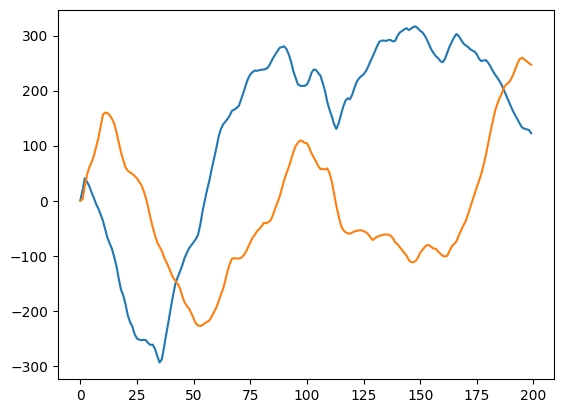

In [54]:
plt.plot(record_x[:,13])
plt.plot(record_x[:,14])

In [53]:
inv_J = np.linalg.inv(np.identity(N_E+N_I) - J)
cov = np.dot(inv_J, inv_J.T)
cov_exp = np.cov(record_x.T)

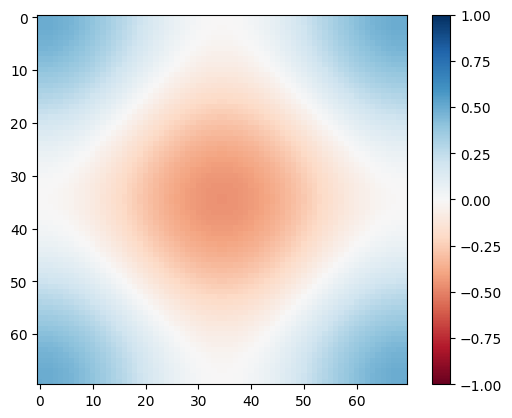

In [54]:
norm = mcolors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
plt.imshow((cov-np.identity(N_E+N_I))[0,0:4900].reshape((70,70)),cmap=plt.cm.RdBu,norm=norm)
plt.colorbar()

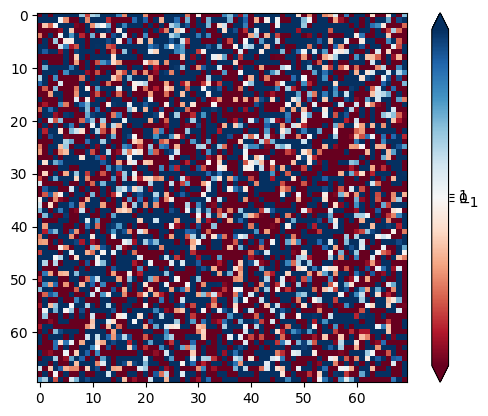

In [55]:
norm = mcolors.TwoSlopeNorm(vmin=-50, vcenter=0, vmax=50)
plt.imshow(record_x[100][0:N_E].reshape((70,70)),cmap=plt.cm.RdBu, norm=norm,origin='upper',aspect=1)
cb = plt.colorbar(extend='both',ticks=[-1,0,1])

In [56]:
frames = []
for step in trange(int(np.floor(T*t_step//record_step))):
    fig, ax = plt.subplots()
    
    norm = mcolors.TwoSlopeNorm(vmin=-100, vcenter=0, vmax=100)
    img = ax.imshow(record_x[step][0:N_E].reshape((70, 70)), cmap=plt.cm.RdBu, norm=norm, origin='upper', aspect=1)
    cb = fig.colorbar(img, ax=ax, extend='both', ticks=[-50, 0, 50])
    
    # 保存当前帧
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(frame)
    
    # 关闭当前图表
    plt.close(fig)

# 将所有帧保存为一个GIF
imageio.mimsave('try.gif', frames, duration=100)


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:17<00:00, 11.51it/s]


 ...]

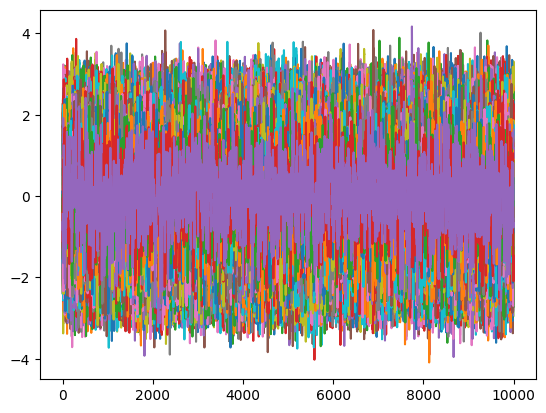

In [46]:
plt.plot(record_x)

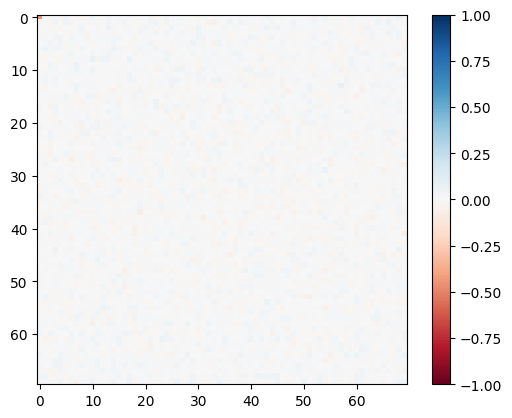

In [62]:
norm = mcolors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
plt.imshow((cov_exp-np.identity(N_E+N_I))[0,0:4900].reshape((70,70)),cmap=plt.cm.RdBu,norm=norm)
plt.colorbar()

In [48]:
(cov-np.identity(N_E+N_I))[0,0:4900][36]

-0.00251615354475498

In [7]:
rescale = 1600
sigma_rescale = 5.5
N_E, N_I = 22500, 5625
conn_NEE, conn_NIE, conn_NEI, conn_NII = 800, 200, 800, 200
J_EE, J_IE, J_EI, J_II = 4/rescale, 4/rescale, -8/rescale, 0/rescale
sigma_EE, sigma_IE, sigma_EI, sigma_II = tuple(np.array([8/rescale, 8/rescale, 16/rescale, 0/rescale]) * sigma_rescale)
d_EE, d_IE, d_EI, d_II = 0.1, 0.1, 0.1, 0.1   

sigma_rescale_list = list(np.array([0.2,0.6,1,1.4,1.8]) * sigma_rescale)
sigma_rescale = sigma_rescale_list[0]
sigma_EE, sigma_IE, sigma_EI, sigma_II = tuple(np.array([8/rescale, 8/rescale, 16/rescale, 0/rescale]) * sigma_rescale)
